The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


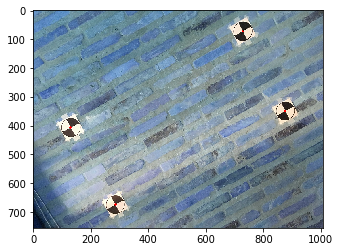

[[286 674]
 [728  73]
 [130 407]
 [876 350]]
None


TypeError: 'NoneType' object has no attribute '__getitem__'

In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from ps3 import *

def sort_4(center): # center is np.array, [[x,y]]
    ans=[]
    if center.shape[0]!=4:
        return None
    else:
        center = center.tolist()
    avex=0
    avey=0
    for i in range(4):
        avex+=center[i][0]
        avey+=center[i][1]
    ave=(avex/4,avey/4)
    for tl in center:
        for bl in center:
            for tr in center:
                for br in center:
                    if (tl==bl or tl==tr or tl==br or bl==tr or bl==br or tr==br):
                        continue
                    topleft = tl[0]<ave[0] and tl[1]<ave[1] #and tl[1]<br[1] and tl[0]<br[0]
                    botleft = bl[0]<ave[0] and bl[1]>ave[1] #and bl[1]>tr[1] and bl[0]<tr[0]
                    topright= tr[0]>ave[0] and tr[1]<ave[1] #and tr[0]>bl[0] and tr[1]<bl[1]
                    botright= br[0]>ave[0] and br[1]>ave[1] #and br[1]>tl[1] br[0]>tl[0] and
                    if (topleft and botleft and topright and botright):
                        ans.append((tl[0],tl[1]))
                        ans.append((bl[0],bl[1]))
                        ans.append((tr[0],tr[1]))
                        ans.append((br[0],br[1]))
                        return ans
    return None


img=cv2.imread('input_images/ps3-3-c_base.jpg')
#img=cv2.imread('input_images/ps3-2-a_base.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = cv2.medianBlur(gray, 5)
ksize = 15#5
sigma = 35#6
gray = cv2.GaussianBlur(gray, (ksize, ksize), sigma, sigma)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 7,3, 0.1)  # blocksize, sobel size, alpha
dst = cv2.dilate(dst, None)
ret, dst = cv2.threshold(dst, 0.16 * dst.max(), 255, 0)  # value=max if > 0.01*max
#plt.imshow(dst)
#plt.show()
all_pts=[]
for x in range(dst.shape[1]):
    for y in range(dst.shape[0]):
        if dst[y][x]!=0:
            all_pts.append((x,y))
all_pts=np.array(all_pts)
all_pts=np.float32(all_pts) #kmeans can only pass float32
#print all_pts.shape
            
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER , 30, 1.0) 
ret,label,center=cv2.kmeans(all_pts,4,criteria,30,cv2.KMEANS_RANDOM_CENTERS) # 4 is num of cluster, 10 is attempts
# Now separate the data, Note the flatten()
#print center.shape
#print sort_4(center)
#print center
#print A,B
center=np.int32(center)
radius = 2
thickness = 3
colo = (255, 0, 0)
for i in center:
    cv2.circle(img, (i[0],i[1]), radius, colo, thickness)
plt.imshow(img)
plt.show()

#p2
thickness=3
print center
markers=sort_4(center)
print markers
cv2.line(img, markers[0], markers[1], (255, 0, 0), thickness)
cv2.line(img, markers[0], markers[2], (255, 0, 0), thickness)
cv2.line(img, markers[3], markers[1], (255, 0, 0), thickness)
cv2.line(img, markers[3], markers[2], (255, 0, 0), thickness)
plt.imshow(img)
plt.show()


#templ=cv2.imread('input_images/rectangle_wall.png')
#res=cv2.matchTemplate(img, templ, 0)
#res=cv2.normalize(res,0,255,norm_type=cv2.NORM_INF)
#ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
#print res[70][90]
#plt.imshow(dst)
#plt.show()

#print dst.shape





#surf = cv2.SURF()
#kp, descritors = surf.detect(gray,None )
#samples = np.array(descritors)
#responses = np.arange(len(kp),dtype = np.float32)
#kp = sift.detect(gray,None)
#img=cv2.drawKeypoints(gray,kp,img)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


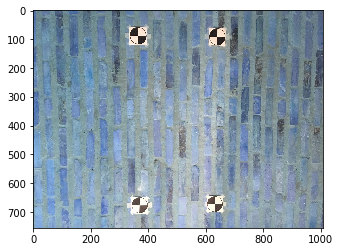

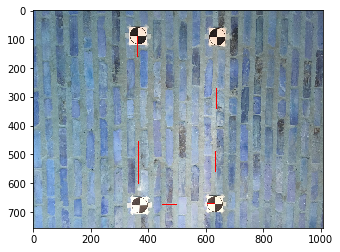

(756L, 1008L, 3L)
756


In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from ps3 import *

img=cv2.imread('input_images/ps3-2-c_base.jpg')
plt.imshow(img)
plt.show()
plt.imshow(draw_box(img, find_markers(img),1))
plt.show()
print img.shape
print img.shape[0]

In [10]:
img=cv2.imread('input_images/ps3-2-c_base.jpg')
center=find_markers(img)
radius = 2
thickness = 3
colo = (255, 0, 0)
for i in center:
    cv2.circle(img, (i[0],i[1]), radius, colo, thickness)
plt.imshow(img)
plt.show()

[[632 671]
 [369 675]
 [640  91]
 [364  88]]
580.05516979 276.016303866 [632, 671] [640, 91] [369, 675] [364, 88]
580.05516979 276.016303866 [369, 675] [364, 88] [632, 671] [640, 91]
580.05516979 276.016303866 [640, 91] [632, 671] [364, 88] [369, 675]
580.05516979 276.016303866 [364, 88] [369, 675] [640, 91] [632, 671]
None


TypeError: 'NoneType' object is not iterable

In [23]:
def creategen():
    for i in range(5):
        yield i**2
    yield None
a=creategen()
for i in range(5):
    print a.next()

0
1
4
9
16


In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from ps3 import *

filename='input_videos/ps3-4-a.mp4'
video = cv2.VideoCapture(filename)
print video
# Do not edit this while loop
while True:
    ret, frame = video.read()
    print ret
    if ret:
        print ret
    else:
        break

# Todo: Close video (release) and yield a 'None' value. (add 2 lines)
video.release()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<VideoCapture 0000000004463710>
False


In [9]:
x = np.array([[1,0,0], [0,2,0], [1,1,0]])
x=np.transpose(np.nonzero(x))
print x
x[:,[0, 1]] = x[:,[1, 0]]
print x

[[0 0]
 [1 1]
 [2 0]
 [2 1]]
[[0 0]
 [1 1]
 [0 2]
 [1 2]]
